# Réalisez une étude de santé publique avec Python

Récemment recruté au sein de l'équipe de chercheurs de la Food and Agriculture Organization of the United Nations (FAO) en tant que Data Analyst, notre équipe vient de se voir confier la réalisation d’une étude de grande ampleur sur le thème de l’alimentation et plus particulièrement sur la sous-nutrition dans le monde. 

La FAO est l’un des organes qui composent l’ONU et dont l’objectif est "d’aider à construire un monde libéré de la faim". 

## Contexte et mission :

L'analyse a été découpée en deux parties. Mon prédécesseur, Julien a déjà traité la partie de 2018 à maintenant avant de partir. J'ai donc, la responsabilité de la partie “historique” avec les données qui concernent la période de 2013 à 2017.

**4 fichiers CSV** sont utilisés.

Un fichier de **disponibilité alimentaire** pour l’année 2017 qui contient 17 variables :
- Le pays.
- Le produit.
- **4 variables de disponibilité alimentaire**. Ces 4 variables sont exprimées
dans des unités bien spécifiques, qui sont précisées directement dans le nom de la variable. À noter cependant que la notation kcal est un abus de langage, elle correspond à une calorie réelle.
- **10 variables** qui précisent les utilisations/moyens d’acquisition de la disponibilité alimentaire. Elles sont toutes exprimées en **milliers de tonnes**.
- Enfin, une variable type qui précise si le produit est d’origine animale ou végétale.

2. Un fichier **d’insécurité alimentaire**, qui inclut :
- Le pays.
- Intervalle d’années.
- Le nombre de personnes en sous-alimentation en millions d’habitants
(ex. : pour l’intervalle 2012-2014, le nombre de personnes correspond à la
moyenne sur ces 3 années, on peut le résumer en 2013).

3. Un fichier de **population** qui inclut :
- Le pays.
- L’année.
- La population du pays, exprimée en milliers d’habitants.

4. Un fichier **d’aide alimentaire** qui contient :
- Le pays bénéficiaire.
- L’année.
- Le produit.
- La quantité qui a été donnée comme aide alimentaire, en tonnes.

L’ensemble de ces fichiers provient initialement des données de la
FAO téléchargeables librement ici : [FAOSTAT](https://www.fao.org/faostat/fr/#data)

**Complément d'informations :**
- La disponibilité alimentaire correspond à la disponibilité d'aliments en
quantité suffisante et d'une qualité appropriée pour l’alimentation humaine.
- La disponibilité intérieure correspond à la disponibilité totale d’un aliment au
sein du pays.
- Il y a un lien logique entre l’ensemble des 10 variables exprimées en milliers de
tonnes sur les utilisations de la disponibilité intérieure, qui peut s’exprimer avec
une équation du type : A1 + A2 + … = disponibilité intérieure = B1 + B2 + …

# Data Wrangling

## 1) Importation des librairies et chargement des fichiers

In [215]:
#Importation des librairies pandas, numpy, matplotlib, seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [216]:
#Importer le fichier population.csv
population = pd.read_csv('population.csv')

#Importer puis renommer le fichier dispo_alimentaire.csv
dispo_alimentaire_2017 = pd.read_csv('dispo_alimentaire.csv')


#Importer le fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv('aide_alimentaire.csv')


#Importer le fichier sous_nutrition.csv
sous_nutrition = pd.read_csv('sous_nutrition.csv', sep=";")

In [217]:
#Afficher les dimensions, la nature des données de chacune des colonnes
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


In [218]:
#Afficher les 5 premières lignes du dataframe
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [219]:
#Afficher les dimensions, la nature des données de chacune des colonnes
dispo_alimentaire_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

In [220]:
#Afficher les 5 premières lignes du dataframe
dispo_alimentaire_2017.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [221]:
#Afficher les dimensions, la nature des données de chacune des colonnes
aide_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


In [222]:
#Afficher les 5 premières lignes du dataframe
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [223]:
#Afficher les dimensions, la nature des données de chacune des colonnes
sous_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  630 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


In [224]:
#Afficher les 5 premières lignes du dataframe
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


## 2) Nettoyer les jeux de données

2.1 Détecter les valeurs manquantes dans chaque _dataframe_

In [225]:
print(population.isnull().sum())

Zone      0
Année     0
Valeur    0
dtype: int64


In [226]:
print(dispo_alimentaire_2017.isnull().sum())

Zone                                                                 0
Produit                                                              0
Origine                                                              0
Aliments pour animaux                                            12885
Autres Utilisations                                              10109
Disponibilité alimentaire (Kcal/personne/jour)                    1364
Disponibilité alimentaire en quantité (kg/personne/an)            1590
Disponibilité de matière grasse en quantité (g/personne/jour)     3811
Disponibilité de protéines en quantité (g/personne/jour)          4044
Disponibilité intérieure                                           223
Exportations - Quantité                                           3379
Importations - Quantité                                            753
Nourriture                                                        1590
Pertes                                                           11327
Produc

In [227]:
print(aide_alimentaire.isnull().sum())

Pays bénéficiaire    0
Année                0
Produit              0
Valeur               0
dtype: int64


In [228]:
print(sous_nutrition.isnull().sum())

Zone        0
Année       0
Valeur    588
dtype: int64


2.2 Renommer, formater les colonnes de chaque _dataframe_ et harmoniser les unités.

In [229]:
# Dataframe population - 
population.rename(str.lower, axis = 'columns',inplace=True)
population.rename(columns = {'année':'annee'},inplace=True )
population.rename(columns= {'valeur':'population (millions hab)'}, inplace=True)
population.rename(columns = {'zone':'pays'}, inplace=True)

In [230]:
# Harmoniser les unités.Multiplication de la colonne valeur par 1000
population['population (millions hab)'] = population['population (millions hab)'] * 1000

In [231]:
# Convertir la colonne Année en donnée object
population['annee'] = population['annee'].astype(object)

In [232]:
#Afficher les 5 premières lignes du dataframe pour contrôler les modifications
population.head()

,pays,annee,population (millions hab)
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


In [233]:
# Renommer et formater les colonnes
dispo_alimentaire_2017.rename(str.lower, axis = 'columns',inplace=True)
dispo_alimentaire_2017.rename(columns = {'zone':'pays'}, inplace=True)

In [234]:
#remplacement des donnéees NaN dans le dataset par des 0
dispo_alimentaire_2017.fillna(0, inplace=True)

In [235]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
for col in ["aliments pour animaux", "autres utilisations", "disponibilité intérieure","exportations - quantité", "importations - quantité", "nourriture", "pertes", "production","semences", "traitement"] :
    dispo_alimentaire_2017[col] =  dispo_alimentaire_2017[col] * 1000

In [236]:
#Afficher les 5 premières lignes du dataframe
dispo_alimentaire_2017.head()

,pays,produit,origine,aliments pour animaux,autres utilisations,disponibilité alimentaire (kcal/personne/jour),disponibilité alimentaire en quantité (kg/personne/an),disponibilité de matière grasse en quantité (g/personne/jour),disponibilité de protéines en quantité (g/personne/jour),disponibilité intérieure,exportations - quantité,importations - quantité,nourriture,pertes,production,semences,traitement,variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0


In [237]:
# Renommer et formater les colonnes
aide_alimentaire.rename(str.lower, axis = 'columns',inplace=True)
aide_alimentaire.rename(columns = {'année':'annee'},inplace=True)
aide_alimentaire.rename(columns= {'pays bénéficiaire':'pays'}, inplace=True)
aide_alimentaire.rename(columns= {'valeur':'aide alimentaire (kg)'}, inplace=True)


In [238]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide_alimentaire['aide alimentaire (kg)'] = aide_alimentaire['aide alimentaire (kg)'] * 1000

In [239]:
#Afficher les 5 premières lignes du dataframe
aide_alimentaire.head()

,pays,annee,produit,aide alimentaire (kg)
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


In [240]:
# Renommer et formater les colonnes
sous_nutrition.rename(str.lower, axis = 'columns',inplace=True)
sous_nutrition.rename(columns = {'année':'annee'}, inplace=True)
sous_nutrition.rename(columns = {'zone':'pays'}, inplace=True)
sous_nutrition.rename(columns = {'valeur':'population sous alimentee (millions hab)'}, inplace=True)

In [241]:
# Remplacer la valeur <0.1 par la valeur 0
sous_nutrition.loc[sous_nutrition['population sous alimentee (millions hab)'] == '<0.1', 'population sous alimentee (millions hab)'] = 0

In [242]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
#Puis remplacement des NaN en 0
sous_nutrition['population sous alimentee (millions hab)'] = pd.to_numeric(sous_nutrition['population sous alimentee (millions hab)'], errors='coerce')
sous_nutrition['population sous alimentee (millions hab)'].fillna(0, inplace=True)

In [243]:
#Multiplication de la colonne sous_nutrition par 1 000 000
sous_nutrition['population sous alimentee (millions hab)'] = sous_nutrition['population sous alimentee (millions hab)'] * 1000000

In [244]:
#Afficher les 5 premières lignes du dataframe
#Supprimer la colonne unnamed
sous_nutrition.head()

,pays,annee,population sous alimentee (millions hab)
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


## 3) Analyse des données

### 3.1 Proportion de personnes en état de sous nutrition

In [245]:
sous_nutrition['annee'] = sous_nutrition['annee'].replace(['2012-2014', '2013-2015', '2014-2016', '2015-2017', '2016-2018', '2017-2019'],[2013, 2014, 2015, 2016, 2017, 2018])
sous_nutrition['annee']

0       2013
1       2014
2       2015
3       2016
4       2017
        ... 
1213    2014
1214    2015
1215    2016
1216    2017
1217    2018
Name: annee, Length: 1218, dtype: object

In [246]:
#Créer la jointure entre le jeu de données population et sous nutrition en ciblant l'année 2017.
population_sous_nutrition = pd.merge(
    (population.loc[population['annee'] == 2017, :]), (sous_nutrition.loc[sous_nutrition['annee'] == 2017, :]),
    on = ['pays'], how = 'outer', indicator=True)

In [247]:
#Contrôler la qualité des jointures
population_sous_nutrition._merge.value_counts()

both          201
left_only      35
right_only      0
Name: _merge, dtype: int64

In [248]:
# Suppression de la colonne Année_y
population_sous_nutrition.drop('annee_y', axis=1, inplace=True)
population_sous_nutrition.drop('_merge', axis=1, inplace=True)

In [249]:
#Renommer la colonne annee_x par annee
population_sous_nutrition.rename(columns={'annee_x':'annee'}, inplace=True)

In [250]:
# Déterminer les valeurs NaN dans les colonnes
population_sous_nutrition.isna().any()

pays                                        False
annee                                       False
population (millions hab)                   False
population sous alimentee (millions hab)     True
dtype: bool

In [251]:
# Compter le nombre de valeurs NaN dans la colonne sous nutrition
population_sous_nutrition['population sous alimentee (millions hab)'].isnull().sum()

35

In [252]:
# Calculer le pourcentage de valeur NaN dans la colonne sous nutrition
taux_NaN = population_sous_nutrition['population sous alimentee (millions hab)'].isna().sum() / population_sous_nutrition['population sous alimentee (millions hab)'].shape[0]
print('{:.1%}'.format(taux_NaN))

14.8%


**Calcul du nombre et du taux de personnes en état de sous nutrition**

In [253]:
total_personne_sous_alimentee_2017 = population_sous_nutrition['population sous alimentee (millions hab)'].sum()
print(total_personne_sous_alimentee_2017),'{:,}'.format(total_personne_sous_alimentee_2017).replace(',', ' ')

534800000.0


(None, '534 800 000.0')

In [254]:
#Calcul et affichage du nombre de personnes en état de sous nutrition
taux_sous_nutrition = population_sous_nutrition['population sous alimentee (millions hab)'].sum() / population_sous_nutrition['population (millions hab)'].sum()
print('{:.1%}'.format(taux_sous_nutrition))

7.1%


### 3.2 Nombre théorique de personnes qui pourraient être nourries

**Note** : Besoins énergétiques alimentaires moyens (kcal/personne/jour) en 2017: 2352 (FAOSTAT)

In [255]:
#Jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
tab2 = pd.merge(population[population['annee'] == 2017], dispo_alimentaire_2017, on='pays', how = 'outer', indicator=True)

In [256]:
#Contrôler la qualité des jointures
tab2._merge.value_counts()

both          15416
right_only      189
left_only        64
Name: _merge, dtype: int64

In [257]:
#Création du tableau dispo alimentaire agrégé 
tableau_dispo_alimentaire_2017 = tab2.pivot_table(index=['pays', 'annee', 'population (millions hab)'], values='disponibilité alimentaire (kcal/personne/jour)', aggfunc='sum')
tableau_dispo_alimentaire_2017 = tableau_dispo_alimentaire_2017.reset_index()
tableau_dispo_alimentaire_2017.head()

,pays,annee,population (millions hab),disponibilité alimentaire (kcal/personne/jour)
0,Afghanistan,2017,36296113.0,2087.0
1,Afrique du Sud,2017,57009756.0,3020.0
2,Albanie,2017,2884169.0,3188.0
3,Algérie,2017,41389189.0,3293.0
4,Allemagne,2017,82658409.0,3503.0


In [258]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement
tableau_dispo_alimentaire_2017['dispo_kcal'] = tableau_dispo_alimentaire_2017['population (millions hab)'] * tableau_dispo_alimentaire_2017['disponibilité alimentaire (kcal/personne/jour)'] 

In [259]:
#Calcul de la disponibilité alimentaire (kcal/personne/jour) totale en 2017
dispo_alimentaire_2017_totale = tableau_dispo_alimentaire_2017['dispo_kcal'].sum()
print(dispo_alimentaire_2017_totale),'{:,}'.format(dispo_alimentaire_2017_totale).replace(',', ' ')

20918984627331.0


(None, '20 918 984 627 331.0')

In [260]:
#Calcul du nombre de personnes pouvant être nourris par jour
apport_moyen_personne_jour = 2352

nombre_personnes_nourrissables = dispo_alimentaire_2017_totale / apport_moyen_personne_jour
print(nombre_personnes_nourrissables),'{:,}'.format(nombre_personnes_nourrissables).replace(',', ' ')

8894126117.0625


(None, '8 894 126 117.0625')

In [261]:
# Calcul de la population mondiale en 2017
population_mondiale_2017 = tableau_dispo_alimentaire_2017['population (millions hab)'].sum()
print(population_mondiale_2017),'{:,}'.format(population_mondiale_2017).replace(',', ' ')

7548134111.0


(None, '7 548 134 111.0')

In [262]:
# Taux de personnes qui peuvent être nourries en 2017
(nombre_personnes_nourrissables / population_mondiale_2017) *100

117.83211567612409

### 3.3 Nombre théorique de personnes qui pourraient être nourries avec les produits végétaux

In [263]:
#Filtrer et créer le dataframe avec les données concernant les végétaux
tableau_origine_vegetale_2017 = tab2.loc[tab2['origine'] == 'vegetale', :]
tableau_origine_vegetale_2017.head()

,pays,annee,population (millions hab),produit,origine,aliments pour animaux,autres utilisations,disponibilité alimentaire (kcal/personne/jour),disponibilité alimentaire en quantité (kg/personne/an),disponibilité de matière grasse en quantité (g/personne/jour),...,disponibilité intérieure,exportations - quantité,importations - quantité,nourriture,pertes,production,semences,traitement,variation de stock,_merge
1,Afghanistan,2017,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,...,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0,both
2,Afghanistan,2017,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,...,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0,both
3,Afghanistan,2017,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,both
4,Afghanistan,2017,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,...,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0,both
6,Afghanistan,2017,36296113.0,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,...,3000.0,0.0,3000.0,3000.0,0.0,0.0,0.0,0.0,0.0,both


In [264]:
#Calcul du nombre de kcal disponible pour les végétaux
tableau_origine_vegetale_2017['disponibilite alimentaire (kcal/population/jour)'] = tableau_origine_vegetale_2017['disponibilité alimentaire (kcal/personne/jour)'] * tableau_origine_vegetale_2017['population (millions hab)']
tableau_origine_vegetale_2017['disponibilite alimentaire (kcal/population/an)'] = tableau_origine_vegetale_2017['disponibilite alimentaire (kcal/population/jour)'] * 365
tableau_origine_vegetale_2017.head()

C:\Users\jerem\AppData\Local\Temp\ipykernel_7684\1337460132.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tableau_origine_vegetale_2017['disponibilite alimentaire (kcal/population/jour)'] = tableau_origine_vegetale_2017['disponibilité alimentaire (kcal/personne/jour)'] * tableau_origine_vegetale_2017['population (millions hab)']
C:\Users\jerem\AppData\Local\Temp\ipykernel_7684\1337460132.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tableau_origine_vegetale_2017['disponibilite alimentaire (kcal/

,pays,annee,population (millions hab),produit,origine,aliments pour animaux,autres utilisations,disponibilité alimentaire (kcal/personne/jour),disponibilité alimentaire en quantité (kg/personne/an),disponibilité de matière grasse en quantité (g/personne/jour),...,importations - quantité,nourriture,pertes,production,semences,traitement,variation de stock,_merge,disponibilite alimentaire (kcal/population/jour),disponibilite alimentaire (kcal/population/an)
1,Afghanistan,2017,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,...,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0,both,36296113.0,1.324808e+10
2,Afghanistan,2017,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,...,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0,both,36296113.0,1.324808e+10
3,Afghanistan,2017,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,both,0.0,0.000000e+00
4,Afghanistan,2017,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,...,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0,both,145184452.0,5.299232e+10
6,Afghanistan,2017,36296113.0,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,...,3000.0,3000.0,0.0,0.0,0.0,0.0,0.0,both,0.0,0.000000e+00


In [265]:
# Compter le nombre de valeurs NaN dans la colonne disponibilite alimentaire (kcal/population/an)
tableau_origine_vegetale_2017['disponibilite alimentaire (kcal/population/an)'].isnull().sum()

145

In [266]:
# Calcul de la disponibilité alimentaire vegetale totale en 2017
dispo_alimentaire_vegetale_2017 = tableau_origine_vegetale_2017['disponibilite alimentaire (kcal/population/an)'].sum()
print(dispo_alimentaire_vegetale_2017),'{:,}'.format(dispo_alimentaire_vegetale_2017).replace(',', ' ')

6300178937197865.0


(None, '6 300 178 937 197 865.0')

In [267]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux en 2017
apport_moyen_annuel_personne = apport_moyen_personne_jour * 365
nombre_personnes_nourrissables_vegetaux = dispo_alimentaire_vegetale_2017 / apport_moyen_annuel_personne 
print(nombre_personnes_nourrissables_vegetaux),'{:,}'.format(nombre_personnes_nourrissables_vegetaux).replace(',', ' ')

7338760294.0055275


(None, '7 338 760 294.0055275')

### 3.4 Utilisation de la disponibilité intérieure

In [268]:
#Calcul de la disponibilité totale
tableau_disponibilite_interieure = tab2

In [269]:
# Compter le nombre de valeurs NaN dans la colonne sous nutrition
tableau_disponibilite_interieure['disponibilité intérieure'].isnull().sum()

64

In [270]:
# Disponibilite interieur = Production + importation - exportation + variation de stock
disponibilite_interieure_totale = tableau_disponibilite_interieure['disponibilité intérieure'].sum()
print(disponibilite_interieure_totale),'{:,}'.format(disponibilite_interieure_totale).replace(',', ' ')

9848994000.0


(None, '9 848 994 000.0')

In [271]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures, 
for col in ['aliments pour animaux', 'autres utilisations', 'exportations - quantité', 'importations - quantité','nourriture', 'pertes','production','semences','traitement','variation de stock'] :
    print(tableau_disponibilite_interieure[col].sum())

1304245000.0
865023000.0
1352158000.0
1296053000.0
4876258000.0
453698000.0
10009680000.0
154681000.0
2204687000.0
-104402.0


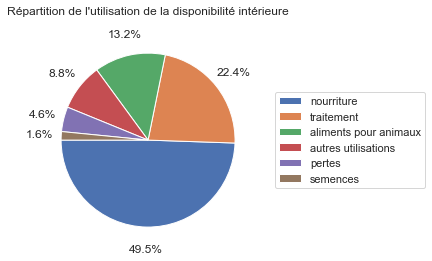

In [272]:
#Graphique de la répartition de la disponibilité intérieure
utilisation_disponibilite = (tableau_disponibilite_interieure[['aliments pour animaux', 'autres utilisations', 'nourriture', 'pertes', 'semences', 'traitement']]
    .sum()
    .sort_values(ascending = False)
)
plt.pie(utilisation_disponibilite.values, autopct = '%.1f%%', pctdistance = 1.25, startangle = 180)
plt.title('Répartition de l\'utilisation de la disponibilité intérieure')
plt.legend(utilisation_disponibilite.index, loc = 7, bbox_to_anchor=(1.8, 0.5))
plt.show()

In [273]:
#Calcul des proportions de la disponibilité intérieure : humaine, animale, perdue et le reste
proportion_animale = round(tableau_disponibilite_interieure['aliments pour animaux'].sum() * 100 / tableau_disponibilite_interieure['disponibilité intérieure'].sum(), 1)
proportion_humaine = round(tableau_disponibilite_interieure['nourriture'].sum() * 100 / tableau_disponibilite_interieure['disponibilité intérieure'].sum(), 1)
proportion_perdue = round(tableau_disponibilite_interieure['pertes'].sum() * 100 / tableau_disponibilite_interieure['disponibilité intérieure'].sum(), 1)
proportion_reste = round(100 - (proportion_animale + proportion_humaine + proportion_perdue) , 2)

print("La disponibilité intérieure est répartie en : " + str(proportion_animale) + " % pour l'alimentation animale, " + str(proportion_humaine) + " % pour l'alimentation \nhumaine, " + str(proportion_perdue) + " % de pertes," + str(proportion_reste) + " % pour le reste." ) 

La disponibilité intérieure est répartie en : 13.2 % pour l'alimentation animale, 49.5 % pour l'alimentation 
humaine, 4.6 % de pertes,32.7 % pour le reste.


### 3.5 Utilisation des céréales

In [274]:
# Création de la liste céréales (source: FAOSTAT) pour récupérer les modalités de la colonne produit
liste_cereales = ['Avoine', 'Blé', 'Maïs', 'Millet', 'Orge', 'Riz (Eq Blanchi)', 'Seigle', 'Sorgho', 'Céréales, Autres']

In [275]:
# Filtrer le dataframe avec les informations uniquement pour ces céréales
tab_cereales_aides = tab2.loc[tab2['produit'].isin(liste_cereales), :]
tab_cereales_aides.head()

,pays,annee,population (millions hab),produit,origine,aliments pour animaux,autres utilisations,disponibilité alimentaire (kcal/personne/jour),disponibilité alimentaire en quantité (kg/personne/an),disponibilité de matière grasse en quantité (g/personne/jour),...,disponibilité intérieure,exportations - quantité,importations - quantité,nourriture,pertes,production,semences,traitement,variation de stock,_merge
7,Afghanistan,2017,36296113.0,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,...,5992000.0,0.0,1173000.0,4895000.0,775000.0,5169000.0,322000.0,0.0,-350.0,both
12,Afghanistan,2017,36296113.0,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,both
32,Afghanistan,2017,36296113.0,Maïs,vegetale,200000.0,0.0,21.0,2.50,0.30,...,313000.0,0.0,1000.0,76000.0,31000.0,312000.0,5000.0,0.0,0.0,both
34,Afghanistan,2017,36296113.0,Millet,vegetale,0.0,0.0,3.0,0.40,0.02,...,13000.0,0.0,0.0,12000.0,1000.0,13000.0,0.0,0.0,0.0,both
40,Afghanistan,2017,36296113.0,Orge,vegetale,360000.0,0.0,26.0,2.92,0.24,...,524000.0,0.0,10000.0,89000.0,52000.0,514000.0,22000.0,0.0,0.0,both


In [276]:
#Calcul des proportions de la disponibilité de céréales : humains, animaux
proportion_animaux_dispo_cereales = tab_cereales_aides['aliments pour animaux'].sum()* 100 / tab_cereales_aides['disponibilité intérieure'].sum()
proportion_nourriture_dispo_cereales = tab_cereales_aides['nourriture'].sum() * 100 / tab_cereales_aides['disponibilité intérieure'].sum()
difference_nourriture_animaux_dispo_cereales = proportion_nourriture_dispo_cereales / proportion_animaux_dispo_cereales

print("La part de céréales allouée à l'alimentation humaine est de " + str(round(proportion_nourriture_dispo_cereales, 1)) + " %, la part allouée à l'alimentation animale est \nde " + str(round(proportion_animaux_dispo_cereales, 1)) + " %, soit environ " + str(round(difference_nourriture_animaux_dispo_cereales, 1)) + " fois moins.")

La part de céréales allouée à l'alimentation humaine est de 42.8 %, la part allouée à l'alimentation animale est 
de 36.3 %, soit environ 1.2 fois moins.


### 3.6 Pays avec la proportion de personnes sous-alimentée la plus forte en 2017

In [277]:
#Création de la colonne proportion par pays
population_sous_nutrition['population sous alimentee (millions hab) (%)'] = population_sous_nutrition['population sous alimentee (millions hab)'] / population_sous_nutrition['population (millions hab)'] * 100
population_sous_nutrition.head()

,pays,annee,population (millions hab),population sous alimentee (millions hab),population sous alimentee (millions hab) (%)
0,Afghanistan,2017,36296113.0,10500000.0,28.928718
1,Afrique du Sud,2017,57009756.0,3100000.0,5.437666
2,Albanie,2017,2884169.0,100000.0,3.467203
3,Algérie,2017,41389189.0,1300000.0,3.140917
4,Allemagne,2017,82658409.0,0.0,0.000000


In [278]:
#affichage après trie des 10 pays ou la proportion de personnes sous alimentees est la plus forte en 2017.
population_sous_nutrition = population_sous_nutrition.sort_values('population sous alimentee (millions hab) (%)', ascending=False) 
population_sous_nutrition.head(10)

,pays,annee,population (millions hab),population sous alimentee (millions hab),population sous alimentee (millions hab) (%)
87,Haïti,2017,10982366.0,5300000.0,48.259182
181,République populaire démocratique de Corée,2017,25429825.0,12000000.0,47.188685
128,Madagascar,2017,25570512.0,10500000.0,41.062924
122,Libéria,2017,4702226.0,1800000.0,38.279742
119,Lesotho,2017,2091534.0,800000.0,38.249438
216,Tchad,2017,15016753.0,5700000.0,37.957606
186,Rwanda,2017,11980961.0,4200000.0,35.055619
145,Mozambique,2017,28649018.0,9400000.0,32.810898
219,Timor-Leste,2017,1243258.0,400000.0,32.173531
0,Afghanistan,2017,36296113.0,10500000.0,28.928718


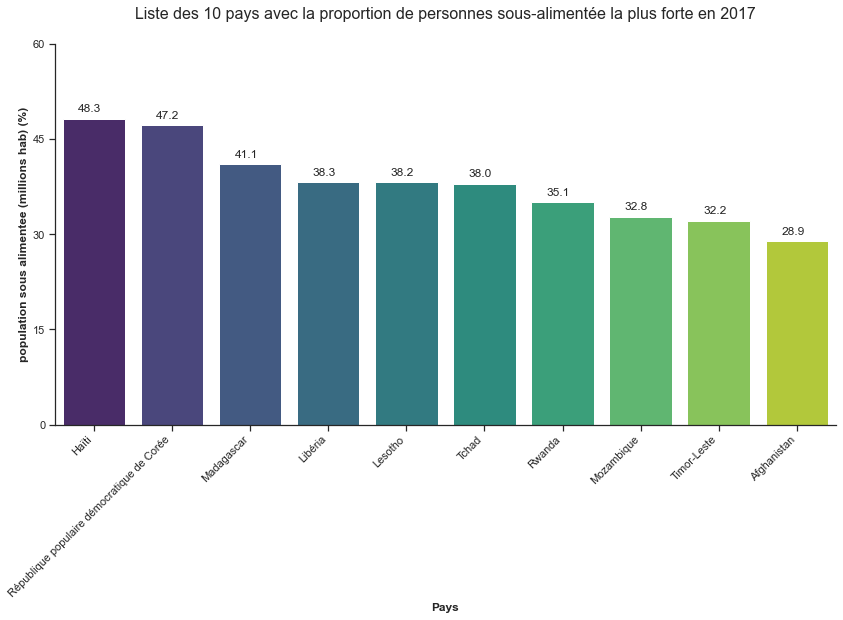

In [279]:
#Graphique
plt.figure(figsize = (14,7))
sns.barplot(data=population_sous_nutrition.head(10) , x='pays', y='population sous alimentee (millions hab) (%)', palette='viridis')
plt.title("Liste des 10 pays avec la proportion de personnes sous-alimentée la plus forte en 2017", fontsize=16)
plt.ylabel("population sous alimentee (millions hab) (%)", fontweight='bold')
plt.xlabel("Pays", fontweight='bold')
plt.rcParams['axes.titley'] = 1.05
plt.xticks(rotation = 45, horizontalalignment='right')
plt.ylim(0,60)
plt.yticks([0, 15, 30, 45, 60])
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

prop_pop = round(population_sous_nutrition.head(10), 1)['population sous alimentee (millions hab) (%)'].tolist()
for i in range(10):
    plt.text(i-0.2, prop_pop[i]+1, prop_pop[i])

plt.show()

### 3.7 Pays qui ont le plus bénéficié de l'aide alimentaire depuis 2013

In [280]:
# affichage après tri des 10 pays qui ont bénéficié le plus de l'aide alimentaire entre 2013 et 2016
tableau_aide_alimentaire_2017 = aide_alimentaire.pivot_table(index=['pays'], values='aide alimentaire (kg)', aggfunc='sum')
tableau_aide_alimentaire_2017 = tableau_aide_alimentaire_2017.reset_index()
tableau_aide_alimentaire_2017 = tableau_aide_alimentaire_2017.sort_values('aide alimentaire (kg)', ascending=False) 
tableau_aide_alimentaire_2017.head(10)

,pays,aide alimentaire (kg)
50,République arabe syrienne,1858943000
75,Éthiopie,1381294000
70,Yémen,1206484000
61,Soudan du Sud,695248000
60,Soudan,669784000
30,Kenya,552836000
3,Bangladesh,348188000
59,Somalie,292678000
53,République démocratique du Congo,288502000
43,Niger,276344000


### 3.8 Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016

In [281]:
#Création d'un dataframe groupé par zone et année classé par ordre décroissant de l'aide alimentaire (kg).
tableau_evolution_aide_alimentaire = aide_alimentaire.pivot_table(index=['pays', 'annee'], values='aide alimentaire (kg)', aggfunc='sum')
tableau_evolution_aide_alimentaire = tableau_evolution_aide_alimentaire.reset_index()
tableau_evolution_aide_alimentaire = tableau_evolution_aide_alimentaire.sort_values('aide alimentaire (kg)', ascending=False)

#Afficher la liste des 10 pays qui ont le plus bénéficiés de l'aide alimentaire
tableau_evolution_aide_alimentaire.head(10)

,pays,annee,aide alimentaire (kg)
158,République arabe syrienne,2014,651870000
225,Éthiopie,2013,591404000
226,Éthiopie,2014,586624000
157,République arabe syrienne,2013,563566000
159,République arabe syrienne,2015,524949000
217,Yémen,2016,465574000
193,Soudan du Sud,2014,450610000
216,Yémen,2015,372306000
189,Soudan,2013,330230000
190,Soudan,2014,321904000


In [282]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire
liste_principaux_beneficiaires_aide_alimentaire = ['République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud','Soudan']

In [283]:
#filtrer le dataframe avec la liste
tableau_5_pays = tableau_evolution_aide_alimentaire.loc[tableau_evolution_aide_alimentaire['pays'].isin(liste_principaux_beneficiaires_aide_alimentaire), :]
tableau_5_pays = tableau_5_pays.sort_values('annee', ascending=True) 

# Afficher la liste des pays
tableau_5_pays = (tableau_5_pays.rename(columns = {'valeur':'aide alimentaire (kg)'}))
tableau_5_pays.head(17)

,pays,annee,aide alimentaire (kg)
189,Soudan,2013,330230000
225,Éthiopie,2013,591404000
157,République arabe syrienne,2013,563566000
192,Soudan du Sud,2013,196330000
214,Yémen,2013,264764000
215,Yémen,2014,103840000
190,Soudan,2014,321904000
158,République arabe syrienne,2014,651870000
193,Soudan du Sud,2014,450610000
226,Éthiopie,2014,586624000


In [284]:
#Creer un tableau croisé des 5 pays
tableau_5_pays_pivot = tableau_5_pays.pivot(index="pays", columns="annee", values="aide alimentaire (kg)")
tableau_5_pays_pivot = tableau_5_pays_pivot.reset_index()
tableau_5_pays_pivot.head()

annee,pays,2013,2014,2015,2016
0,République arabe syrienne,563566000.0,651870000.0,524949000.0,118558000.0
1,Soudan,330230000.0,321904000.0,17650000.0,NaN
2,Soudan du Sud,196330000.0,450610000.0,48308000.0,NaN
3,Yémen,264764000.0,103840000.0,372306000.0,465574000.0
4,Éthiopie,591404000.0,586624000.0,203266000.0,NaN


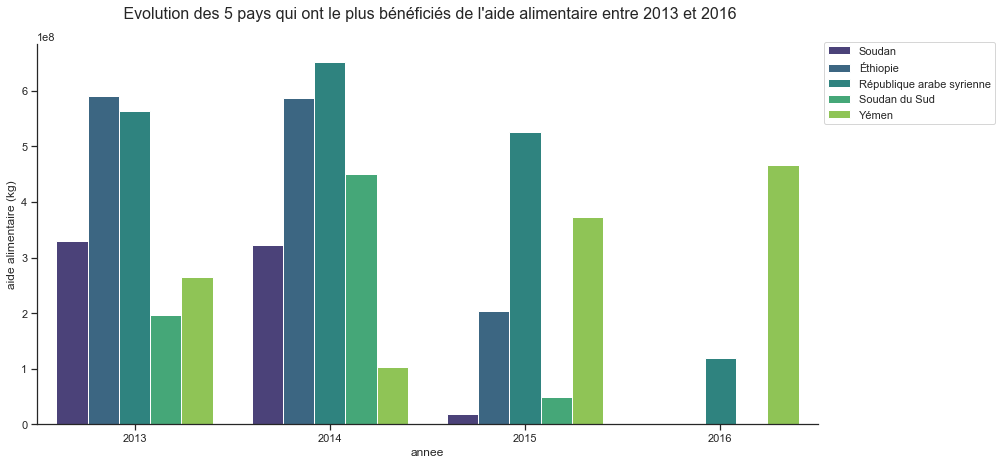

In [285]:
#graphique de l'évolution des 5 pays qui le plus bénéficiés de l'aide alimentaire

plt.figure(figsize = (14,7))
sns.barplot(data= tableau_5_pays, x='annee', y='aide alimentaire (kg)', hue='pays', palette ='viridis')
plt.title(" Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016", fontsize=16)
plt.rcParams['axes.titley'] = 1.05
plt.legend(bbox_to_anchor=(1, 1.02))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

In [286]:
#Cumul annuel de la liste des 5 pays qui ont le plus bénéficié de l'aide alimentaire par ordre décroissant entre 2013 et 2016
tableau_5_pays_cumul = tableau_5_pays.pivot_table(index=['pays'], values='aide alimentaire (kg)', aggfunc='sum')
tableau_5_pays_cumul = tableau_5_pays_cumul.reset_index()
tableau_5_pays_cumul = tableau_5_pays_cumul.sort_values('aide alimentaire (kg)', ascending=False)
tableau_5_pays_cumul.head()

,pays,aide alimentaire (kg)
0,République arabe syrienne,1858943000
4,Éthiopie,1381294000
3,Yémen,1206484000
2,Soudan du Sud,695248000
1,Soudan,669784000


### 3.9 Pays avec le moins de disponibilité par habitant

In [287]:
# Calcul de la disponibilité en kcal par personne par jour par pays - Affichage des 10 pays qui ont le moins de dispo alimentaire par personne - Création d'un pivot table
liste_10_pays_moins_dispo_alimentaire = dispo_alimentaire_2017.pivot_table(index=['pays'], values='disponibilité alimentaire (kcal/personne/jour)', aggfunc='sum')
liste_10_pays_moins_dispo_alimentaire = liste_10_pays_moins_dispo_alimentaire.reset_index()
liste_10_pays_moins_dispo_alimentaire = liste_10_pays_moins_dispo_alimentaire.sort_values('disponibilité alimentaire (kcal/personne/jour)', ascending=True)

# Afficher le tableau
liste_10_pays_moins_dispo_alimentaire = liste_10_pays_moins_dispo_alimentaire.head(10)
liste_10_pays_moins_dispo_alimentaire.head(10)

,pays,disponibilité alimentaire (kcal/personne/jour)
128,République centrafricaine,1879.0
166,Zambie,1924.0
91,Madagascar,2056.0
0,Afghanistan,2087.0
65,Haïti,2089.0
133,République populaire démocratique de Corée,2093.0
151,Tchad,2109.0
167,Zimbabwe,2113.0
114,Ouganda,2126.0
154,Timor-Leste,2129.0


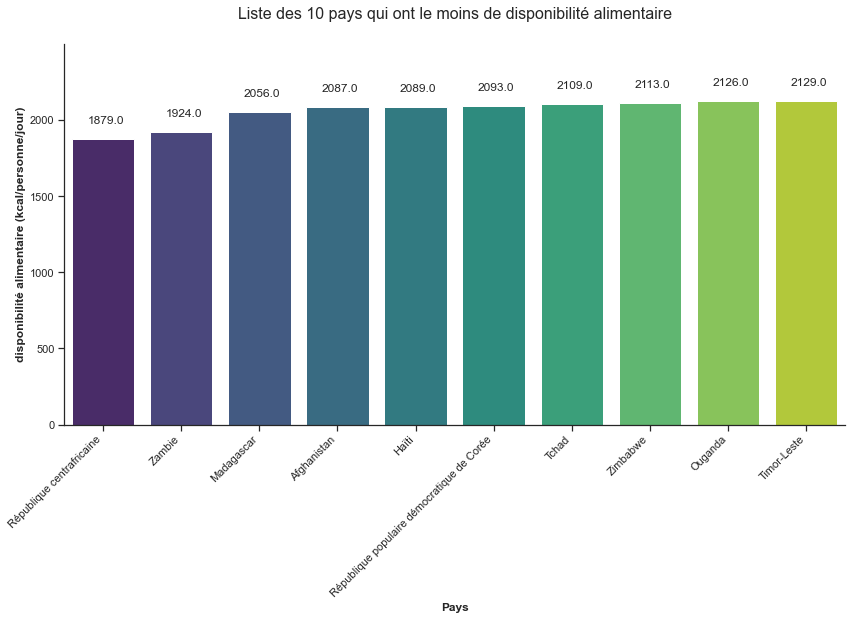

In [288]:
#Graphique
plt.figure(figsize = (14,7))
sns.barplot(data=liste_10_pays_moins_dispo_alimentaire , x='pays', y='disponibilité alimentaire (kcal/personne/jour)', palette='viridis')
plt.title("Liste des 10 pays qui ont le moins de disponibilité alimentaire", fontsize=16)
plt.ylabel("disponibilité alimentaire (kcal/personne/jour)", fontweight='bold')
plt.xlabel("Pays", fontweight='bold')
plt.rcParams['axes.titley'] = 1.05
plt.xticks(rotation = 45, horizontalalignment='right')
plt.ylim(0,2500)
plt.yticks(range(0, 2500, 500))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)


# Afficher les étiquettes sur le graphique
dp_ali_moins = liste_10_pays_moins_dispo_alimentaire['disponibilité alimentaire (kcal/personne/jour)'].tolist()
for i in range(10):
    plt.text(i-0.2, dp_ali_moins[i]+100, dp_ali_moins[i])

plt.show()

### 3.10 Pays avec le plus de disponibilité par habitant

In [289]:
#Affichage des 10 pays qui ont le plus de disponibilite alimentaire par personne 
liste_10_pays_plus_dispo_alimentaire = dispo_alimentaire_2017.pivot_table(index=['pays'], values='disponibilité alimentaire (kcal/personne/jour)', aggfunc='sum')
liste_10_pays_plus_dispo_alimentaire = liste_10_pays_plus_dispo_alimentaire.reset_index()
liste_10_pays_plus_dispo_alimentaire = liste_10_pays_plus_dispo_alimentaire.sort_values('disponibilité alimentaire (kcal/personne/jour)', ascending=False)

liste_10_pays_plus_dispo_alimentaire.head(10)

,pays,disponibilité alimentaire (kcal/personne/jour)
11,Autriche,3770.0
16,Belgique,3737.0
159,Turquie,3708.0
171,États-Unis d'Amérique,3682.0
74,Israël,3610.0
72,Irlande,3602.0
75,Italie,3578.0
89,Luxembourg,3540.0
168,Égypte,3518.0
4,Allemagne,3503.0


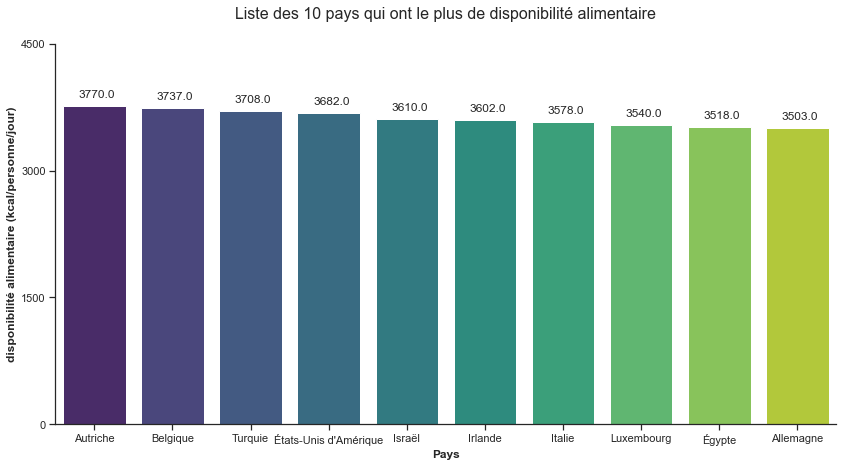

In [290]:
#graphique
plt.figure(figsize = (14,7))
sns.barplot(data= liste_10_pays_plus_dispo_alimentaire.head(10), x='pays', y='disponibilité alimentaire (kcal/personne/jour)', palette='viridis')
plt.title("Liste des 10 pays qui ont le plus de disponibilité alimentaire", fontsize=16)
plt.ylabel("disponibilité alimentaire (kcal/personne/jour)", fontweight='bold')
plt.xlabel("Pays", fontweight='bold')
plt.ylim(0,4000)
plt.yticks([0, 1500, 3000, 4500])
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

#Afficher les étiquettes de données au dessus
dp_ali = liste_10_pays_plus_dispo_alimentaire['disponibilité alimentaire (kcal/personne/jour)'].tolist()
for i in range(10):
    plt.text(i-0.2, dp_ali[i]+100, dp_ali[i])

plt.show()

### 3.11 Exemple de la Thaïlande pour le manioc

In [291]:
# Création d'un dataframe avec uniquement la Thaïlande pour chaque année
tableau_thailande_sous_nutrition = sous_nutrition.loc[sous_nutrition['pays'] == 'Thaïlande', :]
tableau_thailande_sous_nutrition.head()

,pays,annee,population sous alimentee (millions hab)
1110,Thaïlande,2013,6200000.0
1111,Thaïlande,2014,6000000.0
1112,Thaïlande,2015,5900000.0
1113,Thaïlande,2016,6000000.0
1114,Thaïlande,2017,6200000.0


In [292]:
#Calcul de la sous nutrition en Thaïlande depuis 2013
totale_thailande_sous_nutrition = tableau_thailande_sous_nutrition['population sous alimentee (millions hab)'].sum()
print(totale_thailande_sous_nutrition),'{:,}'.format(totale_thailande_sous_nutrition).replace(',', ' ')

36800000.0


(None, '36 800 000.0')

In [293]:
# Filtrer le dataframe sur la Thailande afin d'obtenir les données de la population en état de sous nutrition en millions hab
thailande_population_sous_alimentee_2017 = population_sous_nutrition.loc[population_sous_nutrition['pays'] == 'Thaïlande', :]
thailande_population_sous_alimentee_2017.head()

,pays,annee,population (millions hab),population sous alimentee (millions hab),population sous alimentee (millions hab) (%)
218,Thaïlande,2017,69209810.0,6200000.0,8.958268


In [294]:
# Observations des importations et exportations de manioc par la Thaïlande
thailande_manioc = dispo_alimentaire_2017.loc[(dispo_alimentaire_2017['pays'] == 'Thaïlande') & (dispo_alimentaire_2017['produit'] == 'Manioc'), :]
thailande_manioc.head()

,pays,produit,origine,aliments pour animaux,autres utilisations,disponibilité alimentaire (kcal/personne/jour),disponibilité alimentaire en quantité (kg/personne/an),disponibilité de matière grasse en quantité (g/personne/jour),disponibilité de protéines en quantité (g/personne/jour),disponibilité intérieure,exportations - quantité,importations - quantité,nourriture,pertes,production,semences,traitement,variation de stock
13809,Thaïlande,Manioc,vegetale,1800000.0,2081000.0,40.0,13.0,0.05,0.14,6264000.0,25214000.0,1250000.0,871000.0,1511000.0,30228000.0,0.0,0.0,0.0


In [295]:
# Afficher les resultats par année à l'aide d'un nouveau dataframe
thailande_manioc_population = pd.merge(
    (population.loc[population['pays'] == 'Thaïlande', :]), (thailande_manioc.loc[thailande_manioc['pays'] == 'Thaïlande', :]),
    on = ['pays'], how = 'outer', indicator=True)
thailande_manioc_population.head()

,pays,annee,population (millions hab),produit,origine,aliments pour animaux,autres utilisations,disponibilité alimentaire (kcal/personne/jour),disponibilité alimentaire en quantité (kg/personne/an),disponibilité de matière grasse en quantité (g/personne/jour),...,disponibilité intérieure,exportations - quantité,importations - quantité,nourriture,pertes,production,semences,traitement,variation de stock,_merge
0,Thaïlande,2013,68144518.0,Manioc,vegetale,1800000.0,2081000.0,40.0,13.0,0.05,...,6264000.0,25214000.0,1250000.0,871000.0,1511000.0,30228000.0,0.0,0.0,0.0,both
1,Thaïlande,2014,68438746.0,Manioc,vegetale,1800000.0,2081000.0,40.0,13.0,0.05,...,6264000.0,25214000.0,1250000.0,871000.0,1511000.0,30228000.0,0.0,0.0,0.0,both
2,Thaïlande,2015,68714511.0,Manioc,vegetale,1800000.0,2081000.0,40.0,13.0,0.05,...,6264000.0,25214000.0,1250000.0,871000.0,1511000.0,30228000.0,0.0,0.0,0.0,both
3,Thaïlande,2016,68971308.0,Manioc,vegetale,1800000.0,2081000.0,40.0,13.0,0.05,...,6264000.0,25214000.0,1250000.0,871000.0,1511000.0,30228000.0,0.0,0.0,0.0,both
4,Thaïlande,2017,69209810.0,Manioc,vegetale,1800000.0,2081000.0,40.0,13.0,0.05,...,6264000.0,25214000.0,1250000.0,871000.0,1511000.0,30228000.0,0.0,0.0,0.0,both


## Analyse complémentaire

### 3.12 Evolution de la population mondiale entre 2013 et 2017

In [296]:
# Evolution annuelle de la population mondiale
population_croissance = population.groupby(['annee'])['population (millions hab)'].sum()
population_croissance.head()

annee
2013    7.210846e+09
2014    7.295558e+09
2015    7.380067e+09
2016    7.464295e+09
2017    7.548134e+09
Name: population (millions hab), dtype: float64

### 3.13 Quels sont les catégories de produits les plus produites (quantité)

In [297]:
# Afficher un dataframe avec les produits et leur production
produits_production = tab2.loc[:, ["pays", "annee","population (millions hab)", "produit", "production"]].copy()
produits_production.head()

,pays,annee,population (millions hab),produit,production
0,Afghanistan,2017,36296113.0,Abats Comestible,53000.0
1,Afghanistan,2017,36296113.0,"Agrumes, Autres",3000.0
2,Afghanistan,2017,36296113.0,Aliments pour enfants,0.0
3,Afghanistan,2017,36296113.0,Ananas,0.0
4,Afghanistan,2017,36296113.0,Bananes,0.0


In [298]:
# Afficher les 10 ressources les plus produites
top_10_produits = produits_production.groupby(['produit'])['production'].sum().nlargest(10)
print(top_10_produits.to_markdown())

| produit            |   production |
|:-------------------|-------------:|
| Sucre, canne       |  1.87981e+09 |
| Maïs               |  1.01703e+09 |
| Légumes, Autres    |  8.82664e+08 |
| Lait - Excl Beurre |  7.53035e+08 |
| Blé                |  7.08443e+08 |
| Riz (Eq Blanchi)   |  4.95447e+08 |
| Pommes de Terre    |  3.74223e+08 |
| Soja               |  2.78361e+08 |
| Manioc             |  2.55002e+08 |
| Sucre, betterave   |  2.47026e+08 |


In [299]:
produits_production['production en %'] = produits_production['production'] / produits_production['production'].sum() * 100
produits_production.head()

,pays,annee,population (millions hab),produit,production,production en %
0,Afghanistan,2017,36296113.0,Abats Comestible,53000.0,0.000529
1,Afghanistan,2017,36296113.0,"Agrumes, Autres",3000.0,0.000030
2,Afghanistan,2017,36296113.0,Aliments pour enfants,0.0,0.000000
3,Afghanistan,2017,36296113.0,Ananas,0.0,0.000000
4,Afghanistan,2017,36296113.0,Bananes,0.0,0.000000


In [316]:
# Tableau de fréquence de la production en %
top_10_produits_perc = produits_production.groupby(['produit'])['production en %'].sum().nlargest(10)
print(top_10_produits_perc.to_markdown())

| produit            |   production en % |
|:-------------------|------------------:|
| Sucre, canne       |          18.7799  |
| Maïs               |          10.1605  |
| Légumes, Autres    |           8.8181  |
| Lait - Excl Beurre |           7.52307 |
| Blé                |           7.07758 |
| Riz (Eq Blanchi)   |           4.94968 |
| Pommes de Terre    |           3.73861 |
| Soja               |           2.78092 |
| Manioc             |           2.54755 |
| Sucre, betterave   |           2.46787 |


In [301]:
# Afficher un tableau de fréquence 
produits_production['production en % cumulé'] = produits_production['production en %'].cumsum()
produits_production.head()

,pays,annee,population (millions hab),produit,production,production en %,production en % cumulé
0,Afghanistan,2017,36296113.0,Abats Comestible,53000.0,0.000529,0.000529
1,Afghanistan,2017,36296113.0,"Agrumes, Autres",3000.0,0.000030,0.000559
2,Afghanistan,2017,36296113.0,Aliments pour enfants,0.0,0.000000,0.000559
3,Afghanistan,2017,36296113.0,Ananas,0.0,0.000000,0.000559
4,Afghanistan,2017,36296113.0,Bananes,0.0,0.000000,0.000559


### 3.14 Quels sont les produits les plus disponibles en kcal/personne/jour ?

In [84]:
# Créer un tableau agrégé des produits par disponibilité alimentaire
tab_ressources = tab2.pivot_table(index=['annee', 'produit', 'origine'], values='disponibilité alimentaire (kcal/personne/jour)', aggfunc='sum')
tab_ressources = tab_ressources.reset_index()
tab_ressources.head()

,annee,produit,origine,disponibilité alimentaire (kcal/personne/jour)
0,2017,Abats Comestible,animale,1463.0
1,2017,"Agrumes, Autres",vegetale,128.0
2,2017,"Alcool, non Comestible",vegetale,0.0
3,2017,Aliments pour enfants,vegetale,629.0
4,2017,Ananas,vegetale,653.0


In [85]:
# Afficher les 10 produits qui ont le plus de disponibilité alimentaire
tab_ressources_desc = tab_ressources.sort_values('disponibilité alimentaire (kcal/personne/jour)', ascending=False)
tab_ressources_desc.head(10)

,annee,produit,origine,disponibilité alimentaire (kcal/personne/jour)
12,2017,Blé,vegetale,94682.0
79,2017,Riz (Eq Blanchi),vegetale,52909.0
83,2017,Sucre Eq Brut,vegetale,43705.0
52,2017,Maïs,vegetale,30878.0
48,2017,Lait - Excl Beurre,animale,29484.0
93,2017,Viande de Suides,animale,14903.0
94,2017,Viande de Volailles,animale,12846.0
41,2017,Huile de Soja,vegetale,11422.0
76,2017,Pommes de Terre,vegetale,10691.0
44,2017,Huile de Tournesol,vegetale,9149.0


In [86]:
# Ajouter la colonne disponibilité alimentaire (kcal/personne/jour) en %
tab_ressources_desc['disponibilité alimentaire (kcal/personne/jour) en %'] = tab_ressources['disponibilité alimentaire (kcal/personne/jour)'] / tab_ressources_desc['disponibilité alimentaire (kcal/personne/jour)'].sum() * 100
liste_10_ressources_mondiales = tab_ressources_desc.head(10)
liste_10_ressources_mondiales.head()

,annee,produit,origine,disponibilité alimentaire (kcal/personne/jour),disponibilité alimentaire (kcal/personne/jour) en %
12,2017,Blé,vegetale,94682.0,19.371801
79,2017,Riz (Eq Blanchi),vegetale,52909.0,10.825105
83,2017,Sucre Eq Brut,vegetale,43705.0,8.941980
52,2017,Maïs,vegetale,30878.0,6.317594
48,2017,Lait - Excl Beurre,animale,29484.0,6.032384


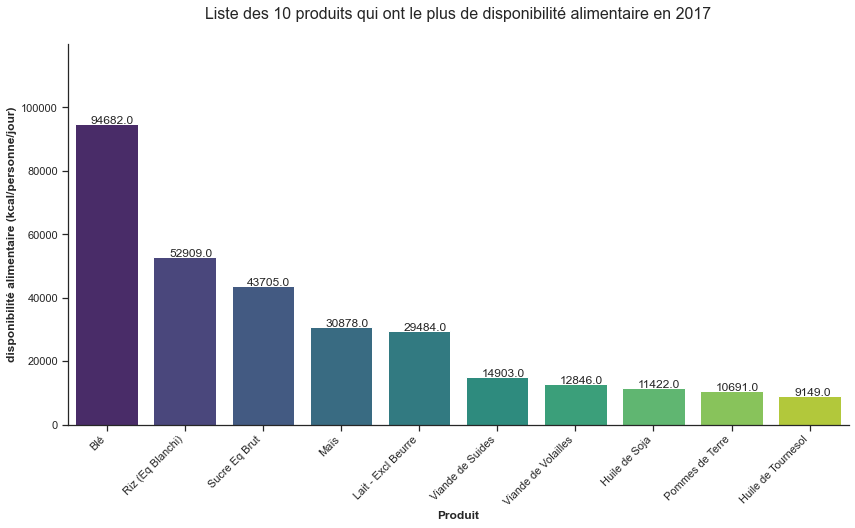

In [87]:
#graphique
plt.figure(figsize = (14,7))
sns.barplot(data= liste_10_ressources_mondiales, x='produit', y='disponibilité alimentaire (kcal/personne/jour)', palette='viridis')
plt.title("Liste des 10 produits qui ont le plus de disponibilité alimentaire en 2017", fontsize=16)
plt.ylabel("disponibilité alimentaire (kcal/personne/jour)", fontweight='bold')
plt.xlabel("Produit", fontweight='bold')
plt.xticks(rotation = 45, horizontalalignment='right')
plt.ylim(0,120000)
plt.yticks(range(0, 120000, 20000))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

#Afficher les étiquettes de données au dessus
dp_produit = liste_10_ressources_mondiales['disponibilité alimentaire (kcal/personne/jour)'].tolist()
for i in range(10):
    plt.text(i-0.2, dp_produit[i]+50, dp_produit[i])

plt.show()

In [88]:
#Création de la colonne disponibilité alimentaire (kcal/personne/jour) pourcentage cumulé
liste_10_ressources_mondiales['disponibilité alimentaire (kcal/personne/jour) en % cumulé'] = liste_10_ressources_mondiales['disponibilité alimentaire (kcal/personne/jour) en %'].cumsum()
liste_10_ressources_mondiales.head(10)

C:\Users\jerem\AppData\Local\Temp\ipykernel_7684\300812310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liste_10_ressources_mondiales['disponibilité alimentaire (kcal/personne/jour) en % cumulé'] = liste_10_ressources_mondiales['disponibilité alimentaire (kcal/personne/jour) en %'].cumsum()


,annee,produit,origine,disponibilité alimentaire (kcal/personne/jour),disponibilité alimentaire (kcal/personne/jour) en %,disponibilité alimentaire (kcal/personne/jour) en % cumulé
12,2017,Blé,vegetale,94682.0,19.371801,19.371801
79,2017,Riz (Eq Blanchi),vegetale,52909.0,10.825105,30.196906
83,2017,Sucre Eq Brut,vegetale,43705.0,8.941980,39.138886
52,2017,Maïs,vegetale,30878.0,6.317594,45.456480
48,2017,Lait - Excl Beurre,animale,29484.0,6.032384,51.488864
93,2017,Viande de Suides,animale,14903.0,3.049132,54.537996
94,2017,Viande de Volailles,animale,12846.0,2.628273,57.166269
41,2017,Huile de Soja,vegetale,11422.0,2.336925,59.503194
76,2017,Pommes de Terre,vegetale,10691.0,2.187363,61.690557
44,2017,Huile de Tournesol,vegetale,9149.0,1.871872,63.562429


In [89]:
#Nombre de produits 
total_produit_2017 = tab_ressources_desc['produit'].nunique()

In [90]:
liste_10_ressources_mondiales['produit'].unique()

array(['Blé', 'Riz (Eq Blanchi)', 'Sucre Eq Brut', 'Maïs',
       'Lait - Excl Beurre', 'Viande de Suides', 'Viande de Volailles',
       'Huile de Soja', 'Pommes de Terre', 'Huile de Tournesol'],
      dtype=object)

In [91]:
# Nombre de produits dans le top 10
Nombre_produits_liste_10_pays = liste_10_ressources_mondiales['produit'].nunique()

In [92]:
#Concentration des disponibilité alimentaires kcal/personne/jour par produit en 2017
concentration_produits = (Nombre_produits_liste_10_pays / total_produit_2017) * 100
print(str(round(concentration_produits,1)) +"% des produits concentrent 63,56 % de la disponibilité alimentaire quotidienne en kcal par personne en 2017. Ces produits sont majoritairement d'origine végétale. OU 5 produits concentrent 51,5% de la disponibilité alimentaire")

10.2% des produits concentrent 63,56 % de la disponibilité alimentaire quotidienne en kcal par personne en 2017. Ces produits sont majoritairement d'origine végétale. OU 5 produits concentrent 51,5% de la disponibilité alimentaire


In [93]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire
liste_10_principaux_produits = ['Blé', 'Riz (Eq Blanchi)', 'Sucre Eq Brut', 'Maïs',
       'Lait - Excl Beurre', 'Viande de Suides', 'Viande de Volailles',
       'Huile de Soja', 'Pommes de Terre', 'Huile de Tournesol']

In [94]:
# Filtrer mon dataframe avec la liste des 10 principaux produits
tableau_10_principaux_produits = tab2.loc[tab2['produit'].isin(liste_10_principaux_produits), :]
tableau_10_principaux_produits.drop('_merge', axis=1, inplace=True)
tableau_10_principaux_produits.head()


C:\Users\jerem\AppData\Local\Temp\ipykernel_7684\2559052587.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tableau_10_principaux_produits.drop('_merge', axis=1, inplace=True)


,pays,annee,population (millions hab),produit,origine,aliments pour animaux,autres utilisations,disponibilité alimentaire (kcal/personne/jour),disponibilité alimentaire en quantité (kg/personne/an),disponibilité de matière grasse en quantité (g/personne/jour),disponibilité de protéines en quantité (g/personne/jour),disponibilité intérieure,exportations - quantité,importations - quantité,nourriture,pertes,production,semences,traitement,variation de stock
7,Afghanistan,2017,36296113.0,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5992000.0,0.0,1173000.0,4895000.0,775000.0,5169000.0,322000.0,0.0,-350.0
26,Afghanistan,2017,36296113.0,Huile de Soja,vegetale,0.0,0.0,13.0,0.53,1.46,0.00,16000.0,0.0,16000.0,16000.0,0.0,0.0,0.0,0.0,0.0
28,Afghanistan,2017,36296113.0,Huile de Tournesol,vegetale,0.0,0.0,18.0,0.75,2.06,0.00,23000.0,0.0,22000.0,23000.0,0.0,1000.0,0.0,0.0,0.0
29,Afghanistan,2017,36296113.0,Lait - Excl Beurre,animale,123000.0,0.0,100.0,62.23,5.19,6.12,2083000.0,0.0,248000.0,1901000.0,58000.0,1835000.0,0.0,0.0,0.0
32,Afghanistan,2017,36296113.0,Maïs,vegetale,200000.0,0.0,21.0,2.50,0.30,0.56,313000.0,0.0,1000.0,76000.0,31000.0,312000.0,5000.0,0.0,0.0


In [95]:
#Créer un tableau agrégé par pays et produits de la disponibilité alimentaire
tab_10_ressources = tableau_10_principaux_produits.pivot_table(index=['annee','pays','produit', 'production'], values='disponibilité alimentaire (kcal/personne/jour)', aggfunc='sum')
tab_10_ressources = tab_10_ressources.reset_index()
tab_10_ressources.head()

,annee,pays,produit,production,disponibilité alimentaire (kcal/personne/jour)
0,2017,Afghanistan,Blé,5169000.0,1369.0
1,2017,Afghanistan,Huile de Soja,0.0,13.0
2,2017,Afghanistan,Huile de Tournesol,1000.0,18.0
3,2017,Afghanistan,Lait - Excl Beurre,1835000.0,100.0
4,2017,Afghanistan,Maïs,312000.0,21.0


### 3.15 Focus sur le blé : la 1ère ressource disponible en kcal/personne/jour

#### Les plus grands producteurs de blé

In [96]:
#Créer un dataframe filtré uniquement sur le produit : blé
producteurs_ble = tableau_10_principaux_produits.loc[(tableau_10_principaux_produits['produit'] == 'Blé'),['pays', 'produit', 'production','exportations - quantité' ]]
producteurs_ble.head()

,pays,produit,production,exportations - quantité
7,Afghanistan,Blé,5169000.0,0.0
72,Afrique du Sud,Blé,1870000.0,495000.0
167,Albanie,Blé,294000.0,4000.0
259,Algérie,Blé,3299000.0,2000.0
352,Allemagne,Blé,25019000.0,10870000.0


In [97]:
#Classement des producteurs de blé par ordre décroissant de leur production
# Conversion de la production 
producteurs_ble = producteurs_ble.sort_values('production', ascending=False)
producteurs_ble.head(10)

,pays,produit,production,exportations - quantité
3198,"Chine, continentale",Blé,121926000.0,563000.0
6774,Inde,Blé,93510000.0,7168000.0
4956,États-Unis d'Amérique,Blé,57967000.0,34691000.0
5143,Fédération de Russie,Blé,52091000.0,14243000.0
5424,France,Blé,38614000.0,21502000.0
2823,Canada,Blé,37530000.0,20704000.0
352,Allemagne,Blé,25019000.0,10870000.0
11109,Pakistan,Blé,24231000.0,946000.0
899,Australie,Blé,22856000.0,18171000.0
14770,Ukraine,Blé,22279000.0,8331000.0


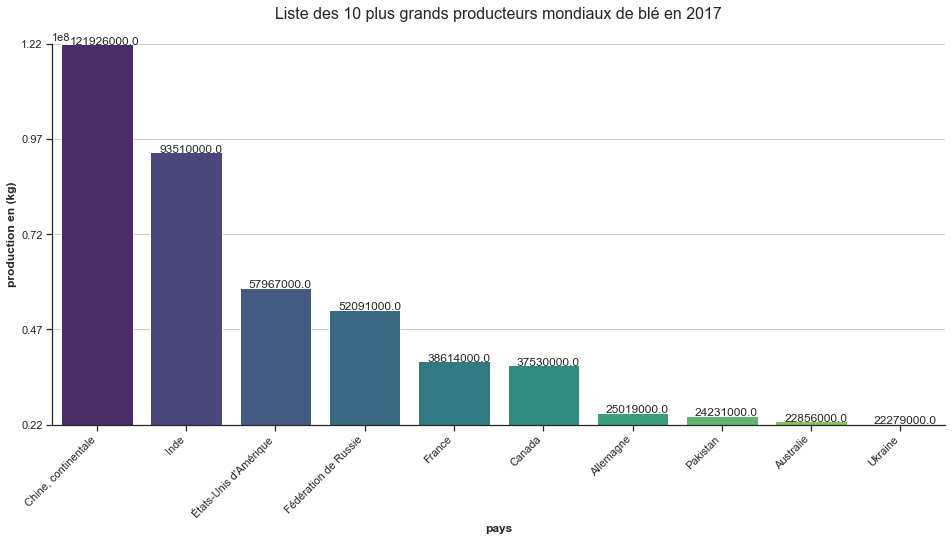

In [98]:
#graphique des producteurs
plt.figure(figsize = (16,7))
sns.barplot(data= producteurs_ble.head(10) , x='pays', y='production', palette='viridis')
plt.title("Liste des 10 plus grands producteurs mondiaux de blé en 2017", fontsize=16)
plt.ylabel("production en (kg)", fontweight='bold')
plt.xlabel("pays", fontweight='bold')
plt.xticks(rotation = 45, horizontalalignment='right')
plt.grid(axis='y')
plt.ylim(22000000,121926000)
plt.yticks(range(22000000, 125000000, 25000000))

#Afficher les étiquettes de données au dessus
dp_producteurs = producteurs_ble['production'].tolist()
for i in range(10):
    plt.text(i-0.3, dp_producteurs[i]+50, dp_producteurs[i])

plt.show()

#### Les plus grands exporteurs de blé dans le top 10 des producteurs

In [99]:
#Ajout de la colonne production exportee en %
producteurs_ble['production exportee en %'] = producteurs_ble['exportations - quantité'] / producteurs_ble['production'] *100
producteurs_ble.head(10)

,pays,produit,production,exportations - quantité,production exportee en %
3198,"Chine, continentale",Blé,121926000.0,563000.0,0.461755
6774,Inde,Blé,93510000.0,7168000.0,7.665490
4956,États-Unis d'Amérique,Blé,57967000.0,34691000.0,59.846119
5143,Fédération de Russie,Blé,52091000.0,14243000.0,27.342535
5424,France,Blé,38614000.0,21502000.0,55.684467
2823,Canada,Blé,37530000.0,20704000.0,55.166533
352,Allemagne,Blé,25019000.0,10870000.0,43.446980
11109,Pakistan,Blé,24231000.0,946000.0,3.904090
899,Australie,Blé,22856000.0,18171000.0,79.502100
14770,Ukraine,Blé,22279000.0,8331000.0,37.393958


In [100]:
# Afficher le tableau des pays qui exportent le plus leur production 
exportateurs_ble = producteurs_ble.loc[:, ['pays', 'produit','production exportee en %']]
exportateurs_ble = exportateurs_ble.head(10)

In [101]:
#Afficher ce tableau dans l'ordre décroissant de la production exportée en %
exportateurs_ble = exportateurs_ble.sort_values('production exportee en %', ascending=False)
exportateurs_ble.head(10)

,pays,produit,production exportee en %
899,Australie,Blé,79.502100
4956,États-Unis d'Amérique,Blé,59.846119
5424,France,Blé,55.684467
2823,Canada,Blé,55.166533
352,Allemagne,Blé,43.446980
14770,Ukraine,Blé,37.393958
5143,Fédération de Russie,Blé,27.342535
6774,Inde,Blé,7.665490
11109,Pakistan,Blé,3.904090
3198,"Chine, continentale",Blé,0.461755


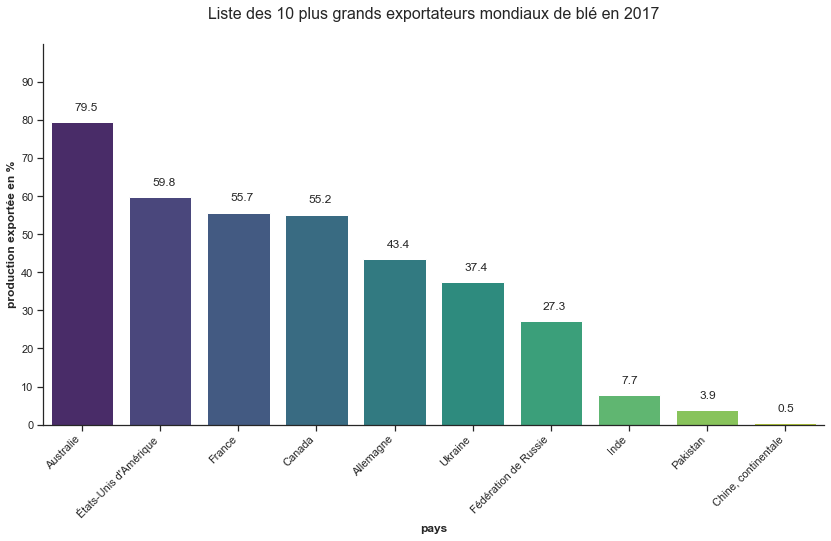

In [102]:
#graphique des exportateurs
plt.figure(figsize = (14,7))
sns.barplot(data= exportateurs_ble , x='pays', y='production exportee en %', palette='viridis')
plt.title("Liste des 10 plus grands exportateurs mondiaux de blé en 2017", fontsize=16)
plt.ylabel("production exportée en %", fontweight='bold')
plt.xlabel("pays", fontweight='bold')
plt.xticks(rotation = 45, horizontalalignment='right')
plt.ylim(0,100)
plt.yticks(range(0, 100, 10))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

#Afficher les étiquettes de données au dessus
dp_exportateurs = round(exportateurs_ble['production exportee en %'], 1).tolist()
for i in range(10):
    plt.text(i-0.1, dp_exportateurs[i]+3, dp_exportateurs[i])

plt.show()

#### Les plus grands importateurs de blé

In [103]:
# Afficher le tableau des 10 plus grands importateurs de blé
importateurs_ble = tableau_10_principaux_produits.loc[(tableau_10_principaux_produits['produit'] == 'Blé'),['pays', 'produit', 'production','importations - quantité', 'exportations - quantité']]
importateurs_ble = importateurs_ble.sort_values('importations - quantité', ascending=False)
importateurs_ble = importateurs_ble.head(10)
importateurs_ble.head(10)

,pays,produit,production,importations - quantité,exportations - quantité
4299,Égypte,Blé,9460000.0,10331000.0,191000.0
2183,Brésil,Blé,5718000.0,7630000.0,1288000.0
6871,Indonésie,Blé,0.0,7074000.0,262000.0
7609,Japon,Blé,812000.0,6520000.0,244000.0
259,Algérie,Blé,3299000.0,6343000.0,2000.0
7420,Italie,Blé,7312000.0,6324000.0,3640000.0
3198,"Chine, continentale",Blé,121926000.0,5666000.0,563000.0
4956,États-Unis d'Amérique,Blé,57967000.0,5491000.0,34691000.0
352,Allemagne,Blé,25019000.0,5421000.0,10870000.0
12043,République de Corée,Blé,19000.0,4906000.0,103000.0


In [104]:
# Ajout de la colonne des importations exprimée en % de la production du pays 
importateurs_ble['importations en % de la production'] = importateurs_ble['importations - quantité'] / importateurs_ble['production'] * 100
importateurs_ble = importateurs_ble.sort_values('importations en % de la production', ascending=True)
importateurs_ble.head()

,pays,produit,production,importations - quantité,exportations - quantité,importations en % de la production
3198,"Chine, continentale",Blé,121926000.0,5666000.0,563000.0,4.647081
4956,États-Unis d'Amérique,Blé,57967000.0,5491000.0,34691000.0,9.472631
352,Allemagne,Blé,25019000.0,5421000.0,10870000.0,21.667533
7420,Italie,Blé,7312000.0,6324000.0,3640000.0,86.487965
4299,Égypte,Blé,9460000.0,10331000.0,191000.0,109.207188


#### La disponibilité intérieure de blé

In [107]:
tableau_10_principaux_produits.head()

,pays,annee,population (millions hab),produit,origine,aliments pour animaux,autres utilisations,disponibilité alimentaire (kcal/personne/jour),disponibilité alimentaire en quantité (kg/personne/an),disponibilité de matière grasse en quantité (g/personne/jour),disponibilité de protéines en quantité (g/personne/jour),disponibilité intérieure,exportations - quantité,importations - quantité,nourriture,pertes,production,semences,traitement,variation de stock
7,Afghanistan,2017,36296113.0,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5992000.0,0.0,1173000.0,4895000.0,775000.0,5169000.0,322000.0,0.0,-350.0
26,Afghanistan,2017,36296113.0,Huile de Soja,vegetale,0.0,0.0,13.0,0.53,1.46,0.00,16000.0,0.0,16000.0,16000.0,0.0,0.0,0.0,0.0,0.0
28,Afghanistan,2017,36296113.0,Huile de Tournesol,vegetale,0.0,0.0,18.0,0.75,2.06,0.00,23000.0,0.0,22000.0,23000.0,0.0,1000.0,0.0,0.0,0.0
29,Afghanistan,2017,36296113.0,Lait - Excl Beurre,animale,123000.0,0.0,100.0,62.23,5.19,6.12,2083000.0,0.0,248000.0,1901000.0,58000.0,1835000.0,0.0,0.0,0.0
32,Afghanistan,2017,36296113.0,Maïs,vegetale,200000.0,0.0,21.0,2.50,0.30,0.56,313000.0,0.0,1000.0,76000.0,31000.0,312000.0,5000.0,0.0,0.0


In [108]:
repartition_ble = tableau_10_principaux_produits.loc[(tableau_10_principaux_produits['produit'] == 'Blé'),['pays', 'produit', 'aliments pour animaux','autres utilisations', 'nourriture', 'pertes', 'semences', 'traitement']]
repartition_ble.head()

,pays,produit,aliments pour animaux,autres utilisations,nourriture,pertes,semences,traitement
7,Afghanistan,Blé,0.0,0.0,4895000.0,775000.0,322000.0,0.0
72,Afrique du Sud,Blé,37000.0,0.0,3174000.0,74000.0,31000.0,0.0
167,Albanie,Blé,18000.0,130000.0,440000.0,44000.0,18000.0,0.0
259,Algérie,Blé,545000.0,820000.0,7270000.0,672000.0,153000.0,0.0
352,Allemagne,Blé,7494000.0,774000.0,6900000.0,663000.0,571000.0,90000.0


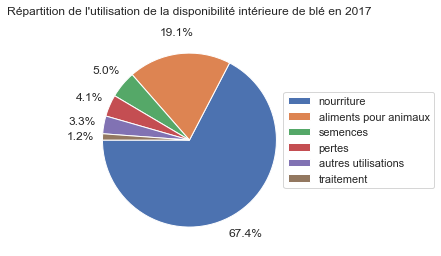

In [109]:
#Graphique de la répartition de la disponibilité intérieure de blé
utilisation_disponibilite_ble = (repartition_ble[['aliments pour animaux', 'autres utilisations', 'nourriture', 'pertes', 'semences', 'traitement']]
    .sum()
    .sort_values(ascending = False)
)
plt.pie(utilisation_disponibilite_ble.values, autopct = '%.1f%%', pctdistance = 1.25, startangle = 180)
plt.title('Répartition de l\'utilisation de la disponibilité intérieure de blé en 2017')
plt.legend(utilisation_disponibilite_ble.index, loc = 7, bbox_to_anchor=(1.65, 0.5))
plt.show()